In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import AxesGrid
import pandas as pd
import ROOT
import time

In [2]:
file_pi0 = ROOT.TFile("../../ML-Data/LAOD/True_Merged_Pi0.root", "OPEN")
tree_pi0 = file_pi0.Get("True_Merged_Calo_Cluster_Pi0")

file_bck = ROOT.TFile("../../ML-Data/LAOD/True_Merged_Bck.root", "OPEN")
tree_bck = file_bck.Get("True_Merged_Calo_Cluster_Bck")

In [3]:
#Get number of entries from tree
nentries_pi0 = tree_pi0.GetEntries()
nentries_bck = tree_bck.GetEntries()

#Set up reading out of a 2d-array from tree
tclus = np.zeros((50,50), dtype=np.float32) #serves as buffer for each array

cluster_pi0 = np.zeros((nentries_pi0,50,50), dtype=np.float32) #array holding all cluster
cluster_bck = np.zeros((nentries_bck,50,50), dtype=np.float32) #array holding all cluster

tree_pi0.SetBranchAddress("Cluster", tclus) #connects branch with buffer
tree_bck.SetBranchAddress("Cluster", tclus)

print(f"Entries Pi0: {nentries_pi0}")
print(f"Entries Bck: {nentries_bck}")

Entries Pi0: 32
Entries Bck: 21


In [4]:
for i in range(nentries_pi0):
    tree_pi0.GetEntry(i)
    cluster_pi0[i,:,:] = tclus
    tclus[:] = 0
    
    
for i in range(nentries_bck):
    tree_bck.GetEntry(i)
    cluster_bck[i,:,:] = tclus
    tclus[:] = 0

/home/j_hone04/anaconda3/lib/python3.8/site-packages/matplotlib/image.py:480: RuntimeWarning: overflow encountered in subtract
  A_scaled -= a_min
/home/j_hone04/anaconda3/lib/python3.8/site-packages/matplotlib/image.py:481: RuntimeWarning: overflow encountered in subtract
  vrange -= a_min
/home/j_hone04/anaconda3/lib/python3.8/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


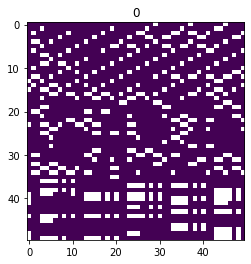

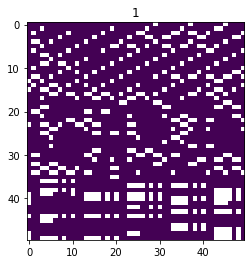

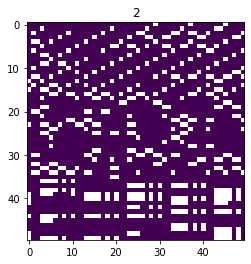

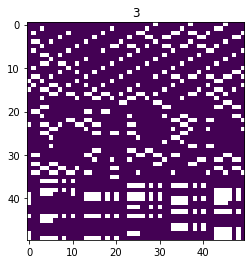

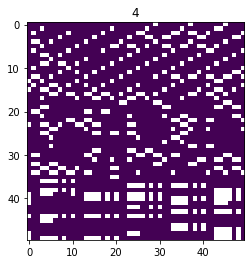

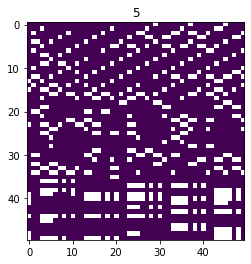

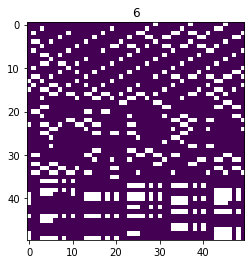

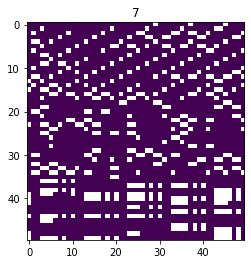

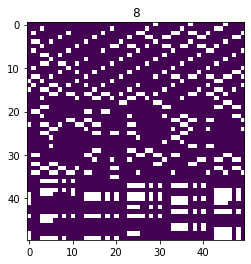

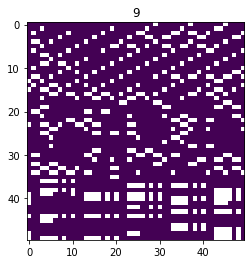

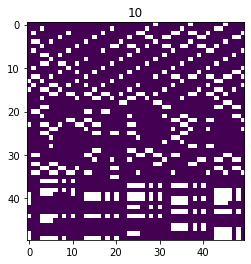

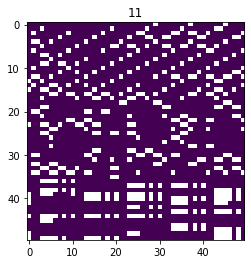

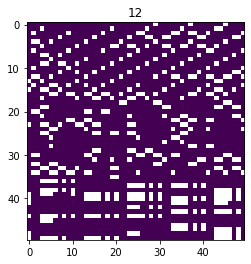

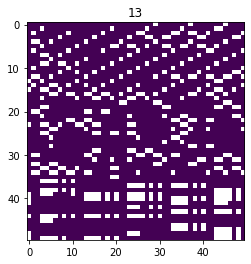

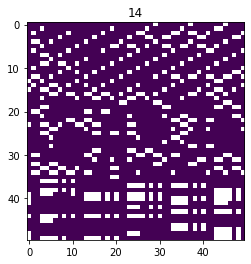

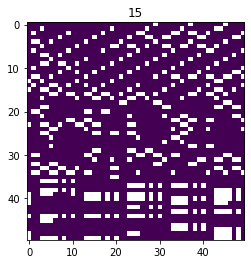

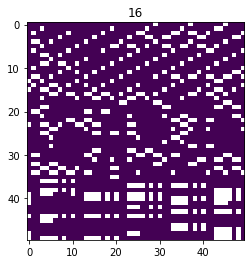

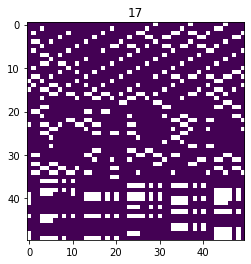

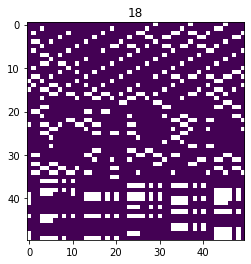

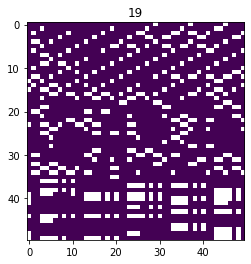

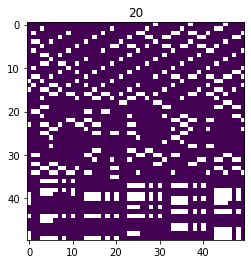

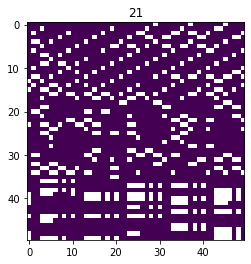

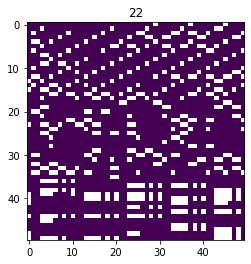

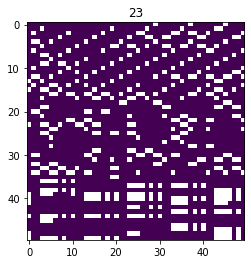

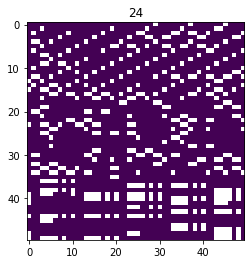

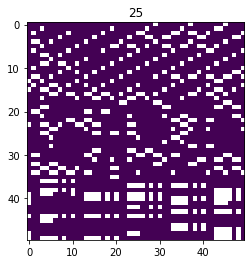

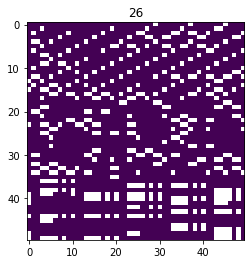

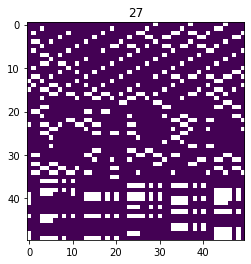

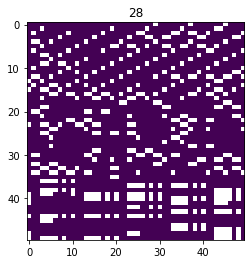

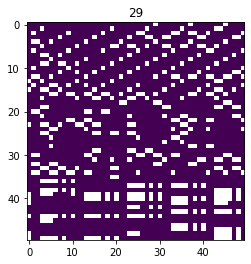

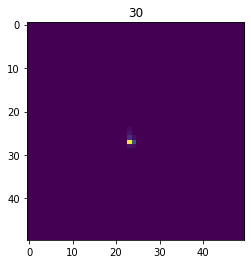

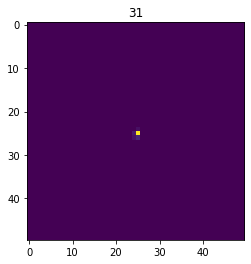

In [5]:
for i in range(nentries_pi0):
    plt.imshow(cluster_pi0[i,:,:])
    plt.title(f"{i}")
    plt.show()

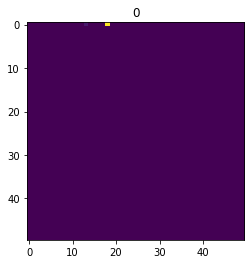

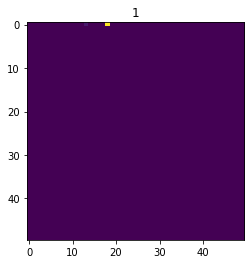

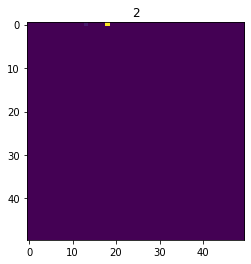

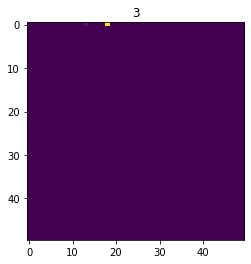

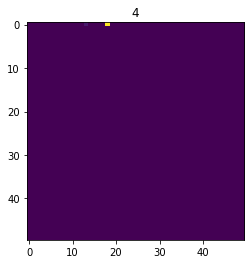

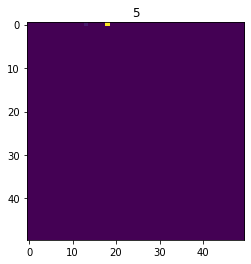

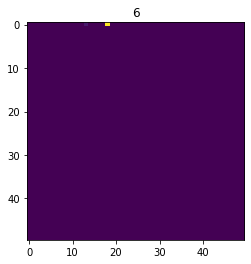

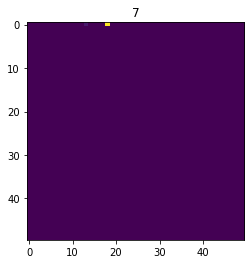

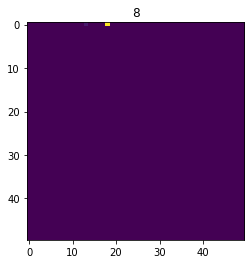

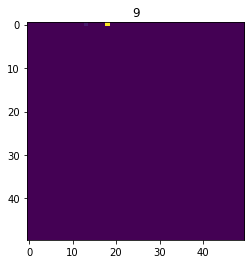

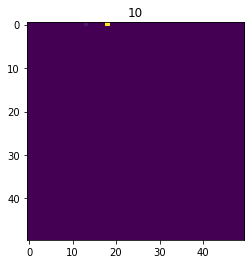

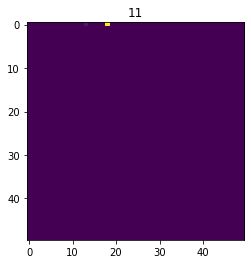

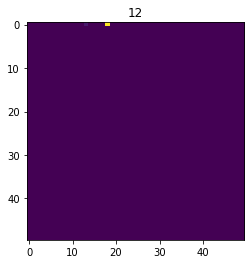

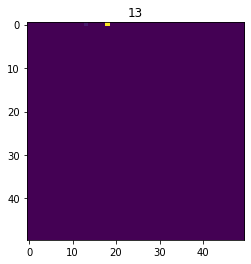

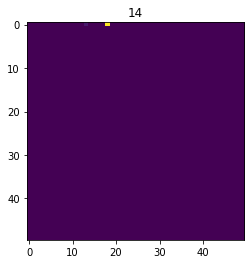

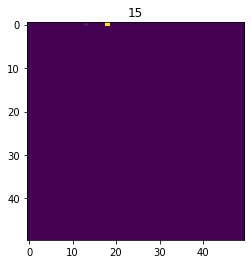

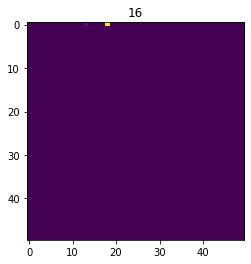

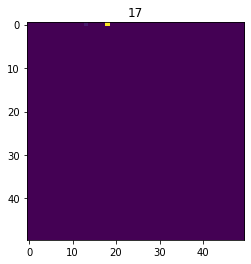

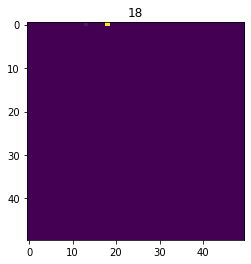

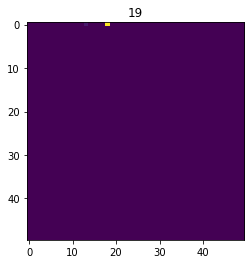

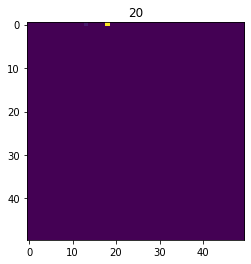

In [6]:
for i in range(nentries_bck):
    plt.imshow(cluster_bck[i,:,:])
    plt.title(f"{i}")
    plt.show()

In [7]:
#Read out all other branches
data, col = tree_pi0.AsMatrix(columns=['ClusterType','E', 'Pt', 'ModuleNumber', 'X', 'Y'], return_labels=True)
#put all other branches in a dataframe
pi0_df = pd.DataFrame(data=data, columns=col)

#print out df head
pi0_df.head()

,ClusterType,E,Pt,ModuleNumber,X,Y
0,1.0,12.739141,12.245251,9.0,1.0,7.0
1,2.0,5.609921,5.194993,9.0,18.0,21.0
2,2.0,5.168575,4.748755,9.0,21.0,14.0
3,2.0,5.752418,5.277642,9.0,22.0,21.0
4,2.0,6.982239,6.694414,8.0,44.0,10.0


In [8]:
#Read out all other branches
data, col = tree_bck.AsMatrix(columns=['ClusterType','E', 'Pt', 'ModuleNumber', 'X', 'Y'], return_labels=True)
#put all other branches in a dataframe
bck_df = pd.DataFrame(data=data, columns=col)

#print out df head
bck_df.head()

,ClusterType,E,Pt,ModuleNumber,X,Y
0,0.0,5.954746,4.790937,2.0,5.0,14.0
1,0.0,5.730947,5.110530,2.0,20.0,13.0
2,0.0,6.313558,6.035316,3.0,6.0,11.0
3,0.0,8.408772,6.652811,5.0,44.0,12.0
4,0.0,5.535414,4.970254,2.0,22.0,15.0


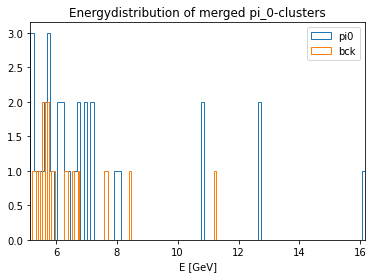

In [9]:
#Energy Histogram
counts, bins, _ = plt.hist(pi0_df['E'], bins=100, histtype='step', label='pi0')
countsb, binsb, _ = plt.hist(bck_df['E'], bins=100, histtype='step', label='bck')
plt.title('Energydistribution of merged pi_0-clusters')
plt.xlabel('E [GeV]')
plt.xlim(bins[0],bins[-1])
plt.legend()

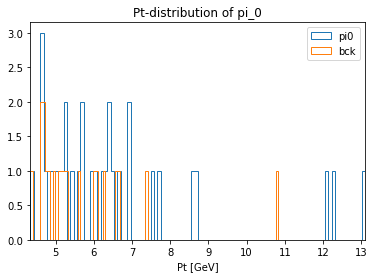

In [10]:
#Pt Histogram
counts, bins, _ = plt.hist(pi0_df['Pt'], bins=100, histtype='step', label='pi0')
counts2, bins2, _ = plt.hist(bck_df['Pt'], bins=100, histtype='step', label='bck')
plt.title('Pt-distribution of pi_0')
plt.xlabel('Pt [GeV]')
plt.xlim(bins[0],bins[-1])
plt.legend()

(0.5, 3.5)

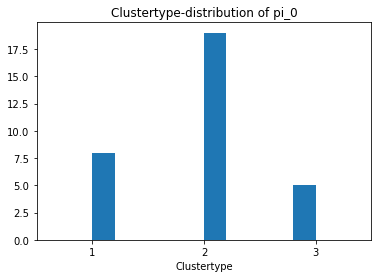

In [11]:
counts, bins, _ = plt.hist(pi0_df['ClusterType'], bins=10)
plt.title('Clustertype-distribution of pi_0')
plt.xlabel('Clustertype')
plt.xticks([1,2,3])
plt.xlim(0.5,3.5)

(-0.1, 10.0)

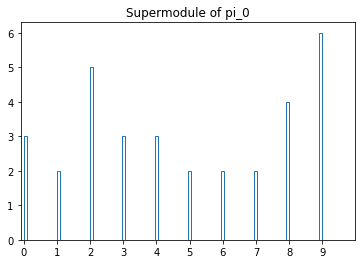

In [12]:
counts, bins, _ = plt.hist(pi0_df['ModuleNumber'], bins=100, histtype='step')
plt.title('Supermodule of pi_0')
plt.xticks(np.arange(0,10))
plt.xlim(-0.1,10)

(0.0, 47.0)

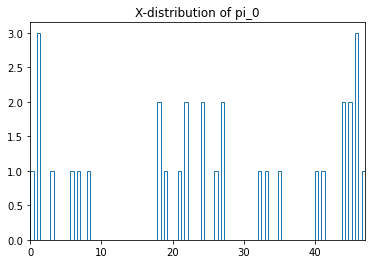

In [13]:
counts, bins, _ = plt.hist(pi0_df['X'], bins=100, histtype='step')
plt.title('X-distribution of pi_0')
plt.xlim(bins[0],bins[-1])

(2.0, 21.0)

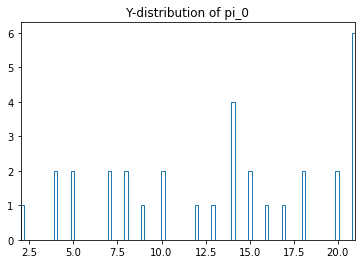

In [14]:
counts, bins, _ = plt.hist(pi0_df['Y'], bins=100, histtype='step')
plt.title('Y-distribution of pi_0')
plt.xlim(bins[0],bins[-1])

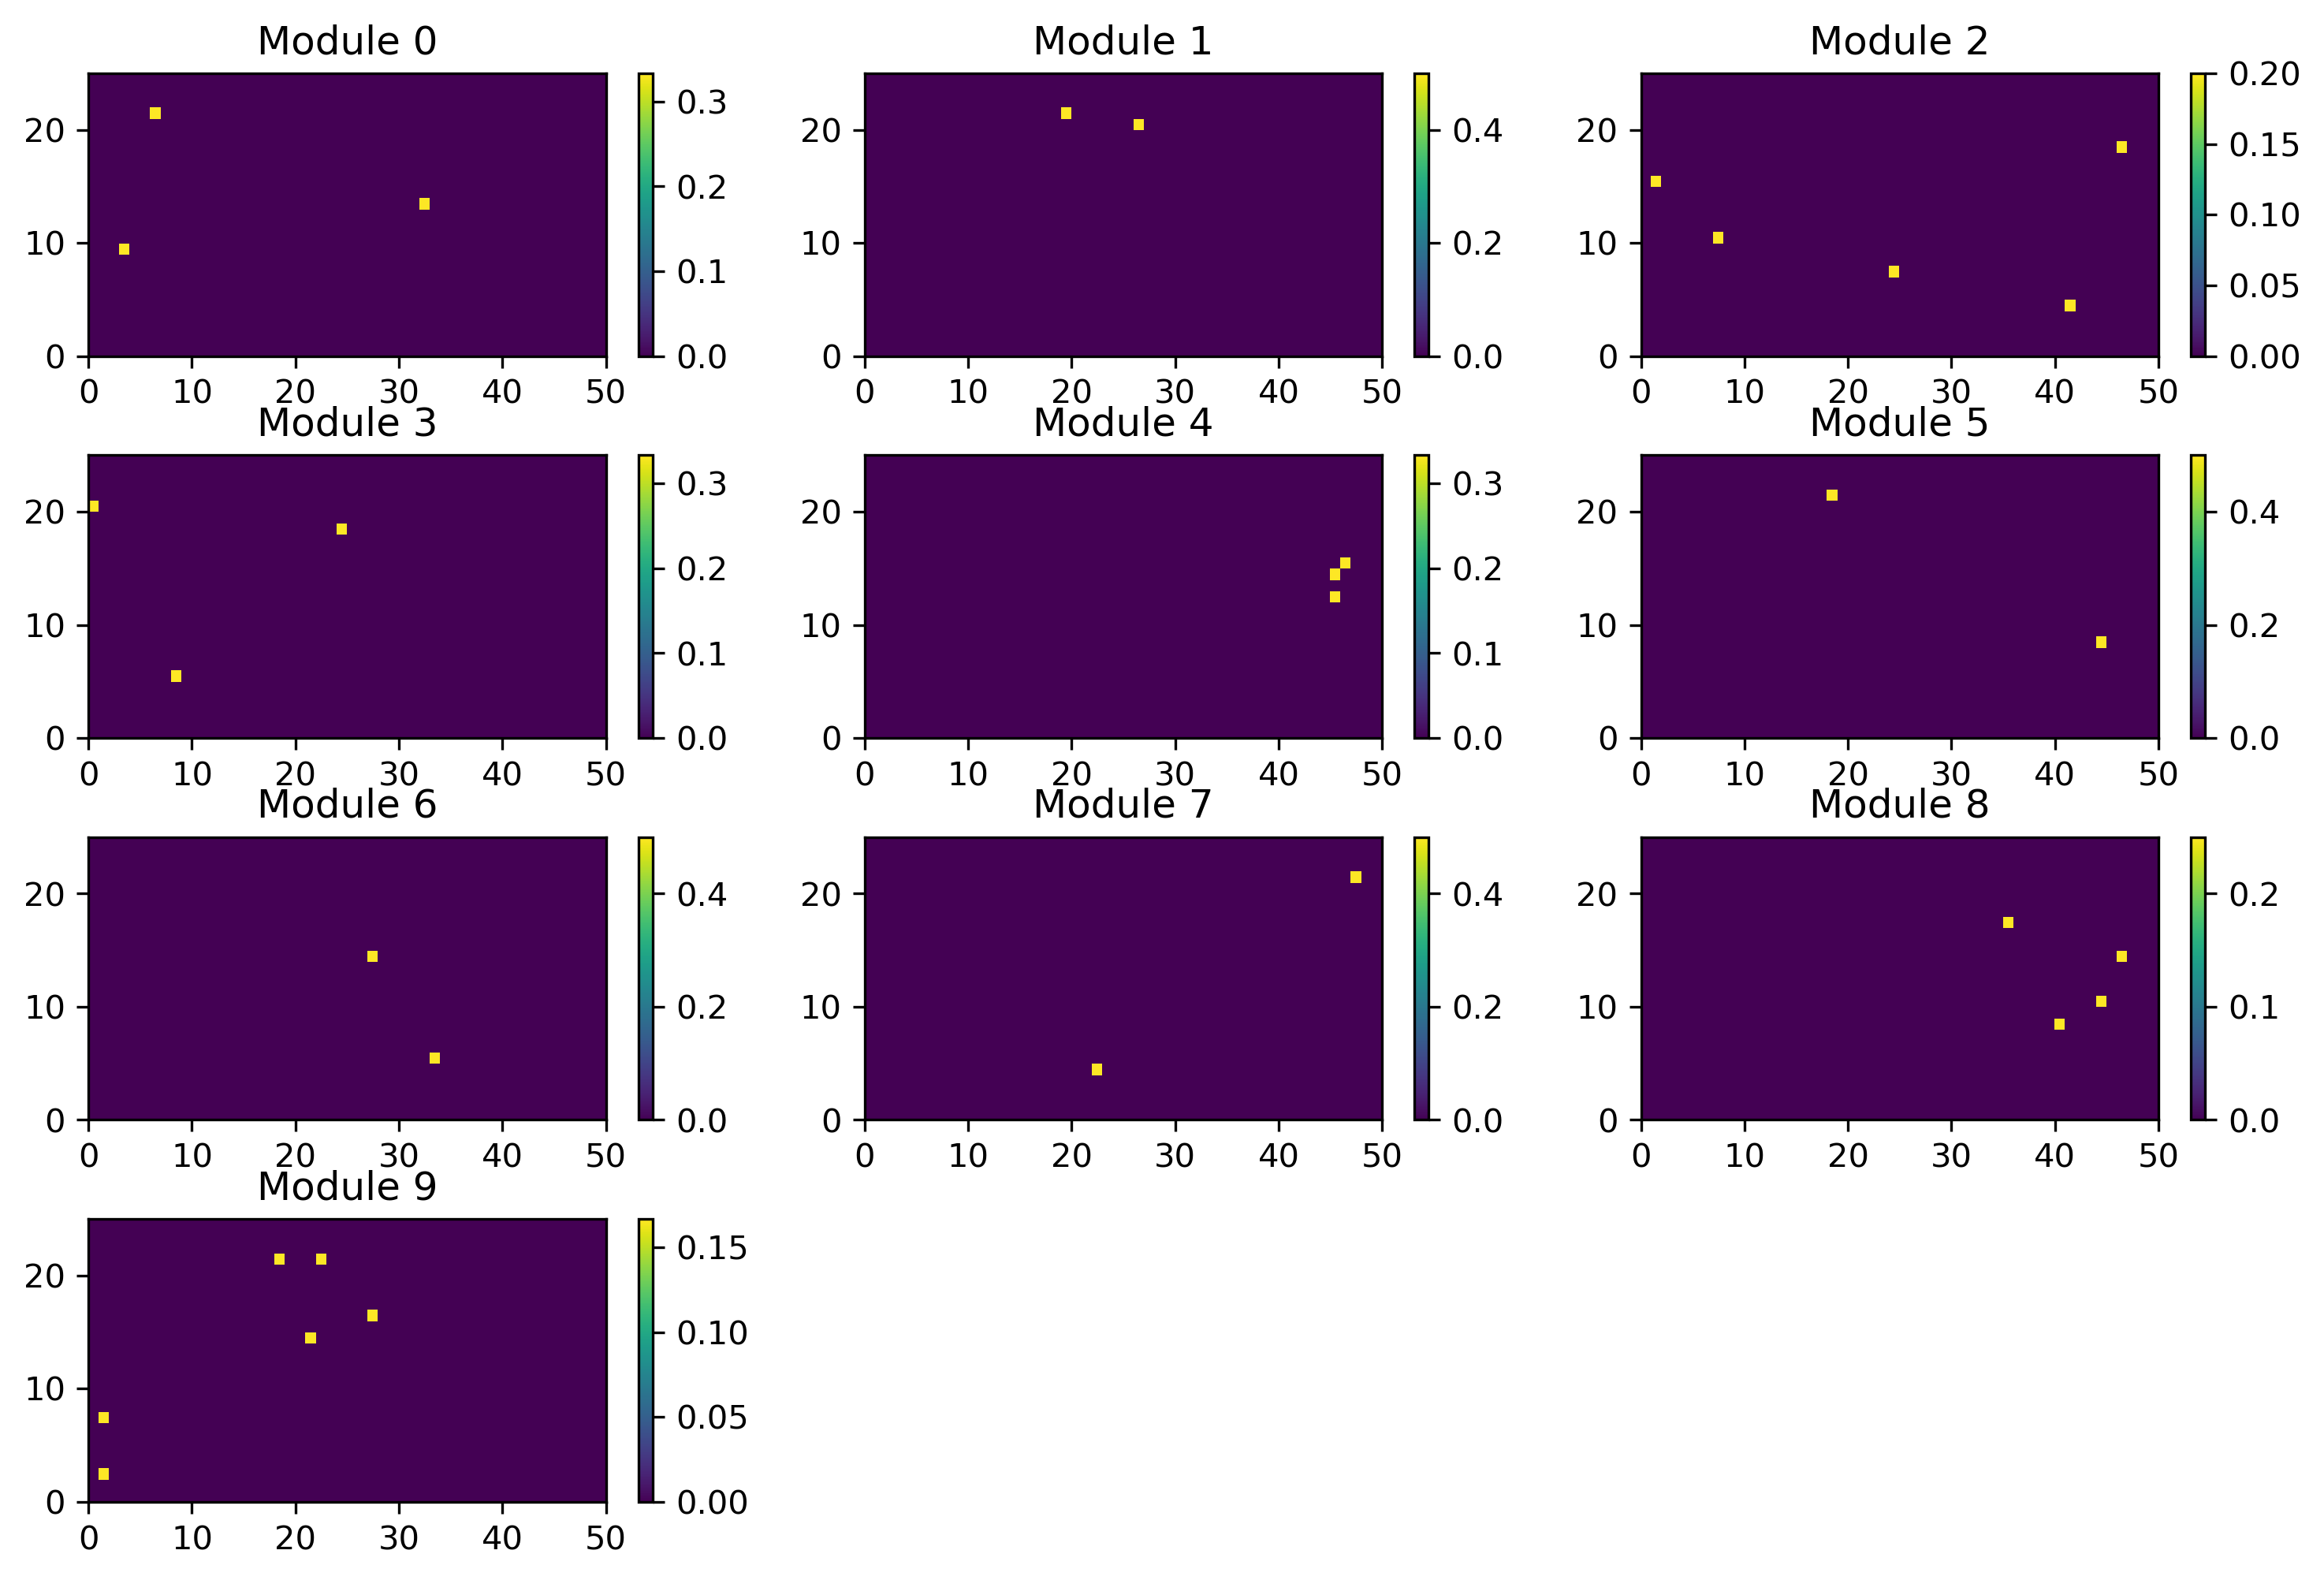

In [56]:
#plot the density of signals in each supermodule
fig = plt.figure(figsize=(12,8), dpi= 300, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(4,3)
modnum = 0

plt.subplots_adjust(hspace=0.35)

for i in range(4):
    for j in range(3):
        if modnum<10:
            ax = fig.add_subplot(gs[i,j])
            c,x,y,im = ax.hist2d(pi0_df.X[pi0_df.ModuleNumber == modnum],\
                      pi0_df.Y[pi0_df.ModuleNumber == modnum],\
                      bins=[50,25],range=[[0.,50.],[0.,25.]],\
                      density=True)
            plt.colorbar(im)
            ax.set_title(f"Module {modnum}")
            modnum+=1

            
  
